<a href="https://colab.research.google.com/github/iiithat/AIMLtraining_AT/blob/main/Day_06-Speech_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Processing

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/0*Vji8JnX0o0wB0qVR.png" alt="speech-rep" width="400"/>  



In [ ]:
import scipy.io

***What is a Speech signal? What makes it different from a normal signal?***

A speech signal is a type of audio signal, but it has some specific characteristics that make it different from other types of audio signals.

- **Non-stationarity**: Speech signals are non-stationary, meaning that their statistical properties change over time. This is because speech signals are made up of a sequence of different sounds, such as vowels, consonants, and pauses. Each of these sounds has different statistical properties. Other types of audio signals, such as music or sound effects, may be more stationary.

- **Frequency range**: Speech signals typically have a frequency range of 80 Hz to 10 kHz, although the most important part of the signal is in the range of 200 Hz to 3500 Hz. This is the frequency range of human hearing, so it is the range of frequencies that are most important for understanding speech. Other types of audio signals, such as music or sound effects, may have a wider frequency range.

- **Dynamic range**: Speech signals have a very wide dynamic range, meaning that the difference between the loudest and softest parts of the signal can be very large. This is because speech signals can vary in loudness depending on the speaker, the distance of the speaker from the microphone, and the environment in which the speech is being recorded. Other types of audio signals may have a narrower dynamic range.




**How do humans produce speech?**

Speech is a complex and dynamic motor activity that allows us to express our thoughts and emotions. It conveys linguistic and non-linguistic information, such as the speaker's identity, gender, emotional state, health condition, language, and environmental conditions. The speech production mechanism is a complex process involving many muscles coordinated activities. It is controlled by the brain, which sends signals to the muscles to produce the desired sounds. Various organs like lungs, trachea, larynx, pharyngeal cavity,
oral cavity, nasal cavity and lips are involved in speech production.It can be broadly divided into sub-processes such as Respiration, Phonation, and Articulation.

**Respiration**: The first step in speech production is respiration. The lungs are the primary source of air for speech and are responsible for providing the air pressure needed to vibrate the vocal folds. The air pressure generated depends on the respiratory muscles strength and the lungs size. Lungs, ribs, chest muscles, and diaphragm are responsible for respiration sub-process. The loudness of the sound is determined by the amount of air pressure that is generated. Air produced in the lungs generates energy for respiration and  reaches the larynx. The phonation process is initiated at the larynx.

**Phonation**: The second step in speech production is phonation. This is the process of producing sound by vibrating the vocal folds. The vocal folds are two folds of tissue in the larynx. When the vocal folds are held together, and the air is passed through them, they vibrate. The frequency of the vibrations determines the pitch of the sound. The pitch of the sound can be varied by changing the tension of the vocal folds or by changing the amount of air pressure generated. Depending on the functioning of vocal folds, different phonations can be experienced by which different sounds are produced. Some of the phonation types are Modal phonation, Creaky phonation, Breathy phonation, Falsetto phonation, Harsh phonation, Whisper phonation.

**Articulation**: The third step in speech production is articulation. This is the process of modifying the sound produced by the vocal folds by changing the shape of the vocal tract. The vocal tract is the space from the larynx to the lips. The tongue, lips, teeth, and jaw can change the shape of the vocal tract. Different vocal tract shapes create different vowels and consonants in speech.
For example, the vowel sound /a/ is produced by a relatively open vocal tract, while the vowel sound /i/ is produced by a relatively closed vocal tract. The consonant sound /p/ is produced by closing the lips, while the consonant sound /m/ is produced by closing the lips and lowering the velum (the soft palate). Each process interacts and influences one another during speech production.
<!-- <img src="https://miro.medium.com/max/1400/1*BzhKcJJxv974OxWOVqUuQQ.png"> -->
<!-- <img src= "https://static.wixstatic.com/media/00d3b0_5fdb171e9d69422b9b6a589f30f2feba.png/v1/fill/w_350,h_255,al_c,lg_1,q_85,enc_auto/00d3b0_5fdb171e9d69422b9b6a589f30f2feba.png">  
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*tzimNnoSuF8UH279hi6pQA.jpeg" width="600"/> -->
<img src="https://i.ibb.co/f1BzmTX/IMG-20230922-WA0008.jpg" width="400"/>







**How does a machine see a signal?**

We are familiar with how a computer/machine looks at an image: as a 2D/3D matrix of numbers which correspond to the intensity of the color. So similarly how does a computer store a signal?

We know that a signal is continuous in nature. But we cannot store continuous data, but only discrete values. So how do we convert an analog continuous signal into a digital discrete signal?

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*M7ziiYu9oJt3zCQEeVelxQ.jpeg" width="600"/>

**What all information does the speech signal hold?**

When a person speaks, what all can we infer by listening to them? Do an experiment: blindfold yourself and listen carefully to the voice of person (preferably a stranger). What all information can you gather from it? You will notice that there is quite a lot more than just the content in speech.

**Linguistic Information**
  - Content: The actual information that the person is trying to convey as a series of sentences.
  - Language: By analyzing the sentences, we can tell the language in which these sentences are spoken in.
  - Ethnicity/Accent: In some cases, a single language can be spoken in different accents from which we can estimate the ethinicity.
  - Emotional state: We can also tell the emotion in which the person is conveying the sentences, whether he is angry, sad, or neutral, etc.
  - Social context: By looking at the content and the structure of the sentences, we can up to an extent, also tell for example if they are talking to a friend, colleague, or customer.

**Acoustic Information**: The speech signal also contains information about the environment in which it was recorded, such as the background noise and the distance between the speaker and the microphone.  

**Speaker Information**:
  - Identity: If we know the person speaking previously, then we will be able to recognize them from just listening to their speech.
  - Gender: If we dont know the person previously, then we can atleast identify their gender.
  - Age: We also can, up to an extent, guess the age of the person speaking.
  - Disorders and Health: Variations in speech patterns can indicate various health conditions and disorders, such as stuttering, dysarthria, or voice disorders.

**Intro to Speech Processing**

In this section, we will briefly introduce basic terms that are used in speech signal processing

<img src="https://miro.medium.com/v2/resize:fit:640/0*cIqWsFl9x8JLLzAJ.gif" width="600"/>  

**Feature Extraction**

**Pre-emphasis**

Pre-emphasis boosts the amount of energy in the high frequencies. For voiced segments like vowels, there is more energy at the lower frequencies than the higher frequencies. This is called spectral tilt which is related to the glottal source (how vocal folds produce sound). Boosting the high-frequency energy makes information in higher formants more available to the acoustic model. This improves phone detection accuracy. For humans, we start having hearing problems when we cannot hear these high-frequency sounds. Also, noise has a high frequency. In the engineering field, we use pre-emphasis to make the system less susceptible to noise introduced in the process later. For some applications, we just need to undo the boosting at the end.  
Pre-emphasis uses a filter to boost higher frequencies. Below is the before and after signal on how the high-frequency signal is boosted.
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*BgDnOWAm5X_xmKCncdgS7g.jpeg" width="600"/>

***Fourier Transform, DFT and FFT***

The Fourier Transform is a mathematical formula that allows us to decompose a signal into it's individual frequencies and the frequency's amplitude. In other words, it converts the signal from the time domain into the frequency domain. The result is called a spectrum.  
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*xTYCtcx_7otHVu-uToI9dA.png" width="600"/>  
The Fourier Transform is designed for a continous signal. As we already discussed computers can only store discrete information, so we use a modified version of FT called the Discrete Fourier Transform (DFT). Here is the DFT formula:
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*gEg1OmRy1YbnQB9kQuOL_Q.jpeg" width="600"/>  
The Fast Fourier Transform (FFT) is an algorithm that can efficiently compute the Discrete Fourier Transform, and is the foundation of all signal processing.

**Windowing**
Windowing involves the slicing of the audio waveform into sliding frames. We have hyper parameters such as window length, hop length, overlap length, window type (such as Hann, Hamming) for performing windowing operation.
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*pYPjNG7naNRP1Og0IivqXw.jpeg" width="600"/>  
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*Zc4TTs7m-vlEEJWq.png" width="600"/>  

**STFT and Linear Spectrogram**
FFT is only defined for periodic signals, where as speech signal is a non periodic signal. But luckily, speech is quasi-stationary, meaning it is periodic in a small duration. Therefore we can still compute FFT for a speech signal, but we apply for small durations. We already have an operation that does this: Windowing. So if we first do windowing and then for each window if we apply FFT, we get STFT (Short Term Fourier Transform) and the output is called a Spectrogram (more specifically Linear Spectrogram).  
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*r3rkXXuwvAjwZli5.png" width="600"/>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*tIBRdtG3EfjmSIlraWVIxw.png" width="600"/>

**Mel Scale and Spectrogram**
Studies have shown that humans do not perceive frequencies on a linear scale. For humans, the perceived loudness changes according to frequency. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same. So researchers have devised a new scale called the Mel scale which captures this.  
<img src="https://miro.medium.com/v2/resize:fit:640/1*erUKb2-Z-Wi_u8JWel6cDQ.gif" width="200"/>  
A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale. There are algorithms that convert a linear frequency range to a mel frequency range. All these mappings are non-linear. In feature extraction, we apply triangular band-pass filters to coverts the frequency information to mimic what a human perceived.  
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*kiho3g2yqLuojsADZsQQNA.png" width="600"/>  
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*dTAxtUkRDwbmRJ3c.png" width="600"/>  

***MFCC***
Mel-frequency cepstral coefficients (MFCCs) are used to represent the spectral characteristics of sound in a way that is well-suited for various machine learning tasks, such as speech recognition and music analysis.

The MFCC extraction process consists of the following steps: Pre-emphasis, Framing, Windowing, FFT, Mel-frequency filtering, Logarithm, DCT
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*3hfXwbKUCfDITmDQtI1H5A.jpeg" width="600"/>  

***Application of Speech Processing***
Speech processing is a field of study and technology that deals with the analysis, synthesis, and manipulation of speech signals. It has a wide range of applications across various domains. Some of them are:

***Automatic Speech Recognition (ASR):*** ASR systems convert spoken language into text. They are used in voice assistants (e.g., Siri, Alexa), transcription services, and voice command recognition.

***Text-to-Speech (TTS) Synthesis:*** TTS systems generate spoken language from text. They are used in navigation systems, audiobooks, and accessibility tools for the visually impaired.

***Speaker Recognition:*** This technology verifies or identifies individuals based on their unique vocal characteristics. It is used in security systems, access control, and forensic applications.

***Emotion Recognition:*** Speech processing can be used to detect emotions from speech, which has applications in customer service (sentiment analysis), mental health monitoring, and human-computer interaction.

***Language Identification:*** Language identification systems determine the language spoken in an audio clip. They are used in multilingual call centers, content filtering, and translation services.

***Speaker Diarization:*** This process segments an audio recording into distinct speaker segments, which is useful in transcription services, meeting analysis, and voice-controlled transcription software.

***Language Translation:*** Speech-to-speech translation systems translate spoken language from one language to another in real time, facilitating cross-lingual communication.

***Voice Assistants:*** Voice-controlled personal assistants (e.g., Siri, Google Assistant) use speech processing for understanding user commands and providing responses and actions.

These are just some examples of the many applications of speech processing technology.

# Demo

For demo purpose, Speaker Recognition task is being done.
Speaker recognition, also known as voice recognition or speaker identification, is a technology that involves identifying or verifying an individual based on their unique vocal characteristics. This technology is often used for security, authentication, and various other applications. There are two primary types of speaker recognition:

    Speaker Identification:
        Identification: In speaker identification, the system determines the identity of a speaker by comparing their voice to a database of known speakers. The system uses various acoustic features of the voice, such as pitch, speech rate, spectral features, and more, to create a unique voiceprint for each individual.
        Applications: Speaker identification is used in applications like access control, voice-based user authentication (e.g., unlocking a smartphone), and in secure facilities where verifying the identity of a speaker is crucial.

    Speaker Verification:
        Verification: In speaker verification, the system verifies if a person is who they claim to be by comparing their voice to a previously enrolled voiceprint. This is often used in two-factor authentication, where something the user knows (e.g., a PIN) is combined with something the user is (their voice).
        Applications: Speaker verification is used in various security applications, including phone-based banking transactions, customer service authentication, and secure voice commands on devices like smart speakers.

## Speaker Recognition using GMM:


In [ ]:
!pip -qq install joblib librosa==0.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.4 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import librosa
import scipy.io.wavfile as wave
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt
import numpy as np
from sklearn import mixture
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DATA_DIR_ZIP = "/content/gdrive/MyDrive/Lab/SR_data.zip"
! unzip -q {DATA_DIR_ZIP} -d .
DATA_DIR = "/content/Speaker_Recognition_Data"

In [ ]:
def traininig(
    train_data_path,
    feat_train_path,
    trained_model_path,
    window_overlap = 0.005,
    n_mixtures = 16,
    max_iterations = 200,
    calc_deltas=True,
    sr=8000,
):
    hop_length=int(0.005*sr)
    all_speakers=glob.glob(train_data_path + '/*')

    if not os.path.exists(feat_train_path):
        os.makedirs(feat_train_path)
    if not os.path.exists(trained_model_path):
        os.makedirs(trained_model_path)


    for itr1 in range(0,len(all_speakers)):
        wavs=glob.glob(all_speakers[itr1]+'/*.wav')
        spk=(all_speakers[itr1]).split("/")[-1]
        final_feat=np.empty([0, 39])

        print(spk)
        for itr2 in range(0,len(wavs)):
            y, sr_ = librosa.load(wavs[itr2])
            y = librosa.resample(y, sr_, sr)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
            mfcc_delta = librosa.feature.delta(mfcc)
            mfcc_ddelta = librosa.feature.delta(mfcc_delta)
            feat=np.concatenate((mfcc,mfcc_delta,mfcc_ddelta),axis=0)
            feat=feat.transpose()
            final_feat=np.concatenate((final_feat,feat),axis=0)

        np.savetxt(os.path.join(feat_train_path, spk + "_all_features.txt"), final_feat, delimiter=",")
        try:
            gmm = mixture.GaussianMixture(n_components=n_mixtures, covariance_type='diag' , max_iter=max_iterations).fit(final_feat)
        except:
            print("ERROR : Error while training model for file "+spk)
        try:
            joblib.dump(gmm, os.path.join(trained_model_path, spk + '.pkl'))
        except:
            print("ERROR : Error while saving model for "+spk)
    print("Training Completed")

In [ ]:
def testing(
    test_data_path,
    feat_test,
    trained_model_path,
    sr=8000,
):
    hop_length=int(0.005*sr)
    all_speakers=glob.glob(test_data_path + '/*')

    if not os.path.exists(feat_test):
        os.makedirs(feat_test)

    speakers = {speaker: ind for ind, speaker in enumerate(all_speakers)}

    num_test_cases={}
    tct={}
    for e in speakers:
        num_test_cases[os.path.basename(e)] = len(os.listdir(e)) - 1
        tct[os.path.basename(e)] = 0

    spk_names = {os.path.basename(key): val for key, val in speakers.items()}
    total_speakers = len(spk_names)
    confusion_matrix = np.zeros((total_speakers, total_speakers))

    for itr1 in range(0,len(all_speakers)):
        wavs=glob.glob(all_speakers[itr1] + '/*.wav')
        spk=(all_speakers[itr1]).split("/")[-1]
        final_feat=np.empty([0, 39])

        print(spk)
        for itr2 in range(0,len(wavs)):
            y, sr_ = librosa.load(wavs[itr2])
            y = librosa.resample(y, sr_, sr)

            mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
            mfcc_delta = librosa.feature.delta(mfcc)
            mfcc_ddelta = librosa.feature.delta(mfcc_delta)
            feat=np.concatenate((mfcc,mfcc_delta,mfcc_ddelta),axis=0)
            feat=feat.transpose()
            final_feat=np.concatenate((final_feat,feat),axis=0)

            max_score=-np.inf
            max_spk_name=""

            for modelfile in sorted(glob.glob(trained_model_path + '/*.pkl')):
                gmm = joblib.load(modelfile)
                score=gmm.score(feat)
                if score>max_score:
                    max_score = score
                    max_spk_name = os.path.splitext(os.path.basename(modelfile))[0]

            print(spk+" -> "+max_spk_name+(" Y" if spk==max_spk_name  else " N"))
            confusion_matrix[ spk_names[spk] ][spk_names[max_spk_name]]+=1
            tct[spk]+=1

        np.savetxt(feat_test+spk+"_all_features.txt", feat, delimiter=",")
    return tct,confusion_matrix,total_speakers

In [ ]:
! rm -r {DATA_DIR}

In [ ]:
train_data=os.path.join(DATA_DIR, "traindata")
test_data=os.path.join(DATA_DIR, "testdata")
feat_train=os.path.join(DATA_DIR, "feat/train")
feat_test=os.path.join(DATA_DIR, "feat/test")
trained_model=os.path.join(DATA_DIR, "train_models")

In [ ]:
traininig(train_data, feat_train, trained_model)

fdfb0
fjlr0
fjlg0
feme0
fdjh0
fgcs0
fcmg0
fcke0
falk0
fgrw0
Training Completed


In [ ]:
tt, conf_mat, tot_spek = testing(test_data, feat_test, trained_model)

fdfb0
fdfb0 -> fcmg0 N
fdfb0 -> fdfb0 Y
fjlr0
fjlr0 -> fjlr0 Y
fjlr0 -> fjlr0 Y
fjlg0
fjlg0 -> fjlg0 Y
fjlg0 -> fjlg0 Y
feme0
feme0 -> feme0 Y
feme0 -> feme0 Y
fdjh0
fdjh0 -> falk0 N
fdjh0 -> falk0 N
fgcs0
fgcs0 -> feme0 N
fgcs0 -> fgcs0 Y
fcmg0
fcmg0 -> fcmg0 Y
fcmg0 -> fcmg0 Y
fcke0
fcke0 -> fcke0 Y
fcke0 -> fcke0 Y
falk0
falk0 -> falk0 Y
falk0 -> falk0 Y
fgrw0
fgrw0 -> fgrw0 Y
fgrw0 -> fgrw0 Y


In [ ]:
print(tt)
print("Confusion Matrix:\n",conf_mat)
print("Accuracy: ",(sum([ conf_mat[i][j] if i==j  else 0 for i in range(tot_spek) for j in range(tot_spek) ] )*100)/float(sum([i for i in tt.values()])))

{'fdfb0': 2, 'fjlr0': 2, 'fjlg0': 2, 'feme0': 2, 'fdjh0': 2, 'fgcs0': 2, 'fcmg0': 2, 'fcke0': 2, 'falk0': 2, 'fgrw0': 2}
Confusion Matrix:
 [[1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]
Accuracy:  80.0


## Speaker Recognition using DNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop,Adadelta
import numpy as np
import joblib
import glob
import os
import keras
import librosa

In [ ]:
def feat_ext(
    feat_path,
    data_path,
    window_overlap = 0.005,
    n_mixtures = 32,
    max_iterations = 200,
    calc_deltas=True,
    sr=8000
):
    all_speakers=glob.glob(data_path + '/*')
    hop_length=int(0.005*sr)

    if not os.path.exists(feat_path):
        os.makedirs(feat_path)

    for itr1 in range(0,len(all_speakers)):
        wavs=glob.glob(all_speakers[itr1]+'/*.wav')
        spk=(all_speakers[itr1]).split("/")[-1]
        final_feat=np.empty([0, 39])

        print(spk)
        for itr2 in range(0,len(wavs)):
            y, sr_ = librosa.load(wavs[itr2])
            y = librosa.resample(y, sr_, sr)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
            mfcc_delta = librosa.feature.delta(mfcc)
            mfcc_ddelta = librosa.feature.delta(mfcc_delta)
            feat=np.concatenate((mfcc,mfcc_delta,mfcc_ddelta),axis=0)
            feat=feat.transpose()
            final_feat=np.concatenate((final_feat,feat),axis=0)
        np.savetxt(os.path.join(feat_path, spk+"_all_features.txt"), final_feat, delimiter=",")
    speakers = {os.path.basename(all_speakers[k]): k for k in range(len(all_speakers)) }
    return speakers

In [ ]:
def dnn_model(
    n_input,
    n_output,
    n_hidden,
    speakers,
    train_feat_path,
    n_epochs=10,
    b_size=20,
    n_cross_val=1,
):
    model = Sequential()
    model.add(Dense(n_hidden, input_shape=(n_input,),activation='relu'))
    model.add(Dense(n_output,activation='softmax'))

    x_train,y_train=[],[]
    for spk in speakers:
        all_spk_data=np.genfromtxt(os.path.join(train_feat_path, spk+"_all_features.txt"), delimiter=',')
        print(all_spk_data.shape)
        all_spk_labels = []
        for i in range(all_spk_data.shape[0]):
            d = np.zeros(len(speakers))
            d[speakers[spk]]=1
            all_spk_labels.append(d)
        all_spk_labels=np.array(all_spk_labels)

        for i in range(all_spk_data.shape[0]):
            x_train.append(all_spk_data[i])
            y_train.append(all_spk_labels[i])
    x_train=np.array(x_train)
    y_train=np.array(y_train)

    print("Training data size:",x_train.shape)

    adadelta=Adadelta(lr=0.1, rho=0.95, epsilon=1e-06)

    # cv_scores=[]
    for cv in range(n_cross_val):
        print("Cross Validation Iteration:",cv)
        model.compile(loss='categorical_crossentropy',optimizer=adadelta,metrics=['accuracy'])
        perm=np.random.permutation(x_train.shape[0])
        x_train=x_train[perm]
        y_train=y_train[perm]
        model.fit(x_train,y_train,epochs=n_epochs,batch_size=b_size,validation_split=0.10)
        print("Training Completed")
    return model

In [ ]:
def test(
    model,
    speakers,
    tst_feat_path,
    n_output,
    b_size=20
):
    total_tests=0
    t_acc=0
    total_frames=0
    f_acc=0
    confusion_matrix=np.zeros((len(speakers),len(speakers)))

    for spk in speakers:
        for testcasefile in glob.glob(os.path.join(tst_feat_path, spk + '*')):
            total_tests+=1
            data=np.genfromtxt(testcasefile, delimiter=',')
            labels=np.zeros((data.shape[0],n_output))
            labels[:,speakers[spk]]+=1
            print("Test data size:",data.shape)
            classes = model.predict(data, batch_size=b_size)
            pred_labels=[ np.argmax(classes[i]) for i in range(classes.shape[0]) ]

            for i in range(len(pred_labels)):
                total_frames+=1
                confusion_matrix[speakers[spk]][pred_labels[i]]+=1
                if pred_labels[i]==speakers[spk]:
                    f_acc+=1
            if np.argmax(confusion_matrix[speakers[spk]])==speakers[spk]:
                t_acc+=1

    test_acc=(t_acc/float(total_tests))*100
    print("Test Accuracy=",test_acc)
    print(confusion_matrix)

In [ ]:
train_data=os.path.join(DATA_DIR, "traindata")
test_data=os.path.join(DATA_DIR, "testdata")
path_feat_trn=os.path.join(DATA_DIR, "feat_dnn/train")
all_speakers_tr = feat_ext(path_feat_trn,train_data)
print(all_speakers_tr)

{'fdfb0': 0, 'fjlr0': 1, 'fjlg0': 2, 'feme0': 3, 'fdjh0': 4, 'fgcs0': 5, 'fcmg0': 6, 'fcke0': 7, 'falk0': 8, 'fgrw0': 9}


In [ ]:
model = dnn_model(
    n_input=39,
    n_output=len(all_speakers_tr),
    n_hidden=70,
    speakers=all_speakers_tr,
    train_feat_path=path_feat_trn
)

(4160, 39)
(4894, 39)
(4794, 39)
(5334, 39)
(4609, 39)
(4476, 39)
(5237, 39)
(4336, 39)
(4976, 39)


(5681, 39)
Training data size: (48497, 39)
Cross Validation Iteration: 0
Epoch 1/10
2183/2183 [==============================] - 6s 2ms/step - loss: 43.1119 - accuracy: 0.1034 - val_loss: 30.3101 - val_accuracy: 0.0955
Epoch 2/10
2183/2183 [==============================] - 6s 3ms/step - loss: 22.6700 - accuracy: 0.0924 - val_loss: 15.9408 - val_accuracy: 0.1002
Epoch 3/10
2183/2183 [==============================] - 7s 3ms/step - loss: 12.8808 - accuracy: 0.0956 - val_loss: 9.8516 - val_accuracy: 0.0953
Epoch 4/10
2183/2183 [==============================] - 10s 5ms/step - loss: 8.7445 - accuracy: 0.0966 - val_loss: 7.9569 - val_accuracy: 0.0979
Epoch 5/10
2183/2183 [==============================] - 7s 3ms/step - loss: 7.4910 - accuracy: 0.1029 - val_loss: 6.9293 - val_accuracy: 0.1041
Epoch 6/10
2183/2183 [==============================] - 7s 3ms/step - loss: 6.5148 - accuracy: 0.1080 - val_loss: 6.0572 - val_accuracy: 0.1068
Epoch 7/10
2183/2183 [==============================] - 8

In [ ]:
path_feat_tst=os.path.join(DATA_DIR, "feat_dnn/test")
all_speakers_tst = feat_ext(path_feat_tst,test_data)
test(
    model,
    all_speakers_tst,
    path_feat_tst,
    n_output=len(all_speakers_tr),
    b_size=20
)

fdfb0
fjlr0
fjlg0
feme0
fdjh0
fgcs0
fcmg0
fcke0
falk0
fgrw0
Test data size: (988, 39)
50/50 [==============================] - 0s 2ms/step
Test data size: (1354, 39)
68/68 [==============================] - 0s 1ms/step
Test data size: (1202, 39)
61/61 [==============================] - 0s 1ms/step
Test data size: (1282, 39)
65/65 [==============================] - 0s 1ms/step
Test data size: (1390, 39)
70/70 [==============================] - 0s 1ms/step
Test data size: (1340, 39)
67/67 [==============================] - 0s 1ms/step
Test data size: (1387, 39)
70/70 [==============================] - 0s 2ms/step
Test data size: (1255, 39)
63/63 [==============================] - 0s 1ms/step
Test data size: (1270, 39)
64/64 [==============================] - 0s 1ms/step
Test data size: (1391, 39)
70/70 [==============================] - 0s 3ms/step
Test Accuracy= 30.0
[[262.  41.  79. 128.  18. 199.  68.  37.  99.  57.]
 [150. 132. 158. 110. 117. 111.  53. 170. 142. 211.]
 [ 57. 109.  95

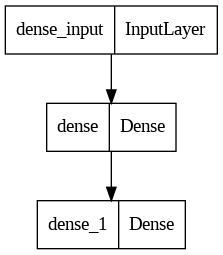

In [ ]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png')
Image("model.png")